### chandan G Y codesoft internship

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### importing the data

In [2]:
df=pd.read_csv("D:/data science projects/codesoft/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 4)

#### check of statistical parameters

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### check 0f null values

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### EDA

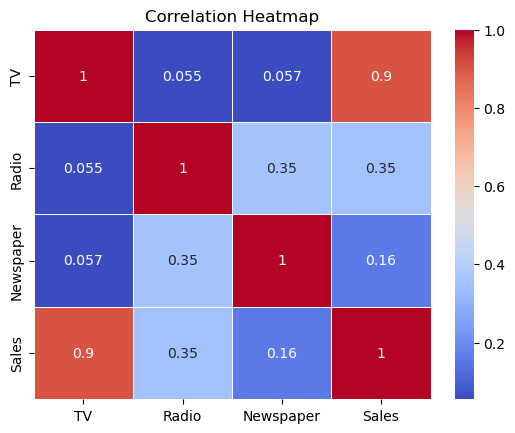

In [8]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

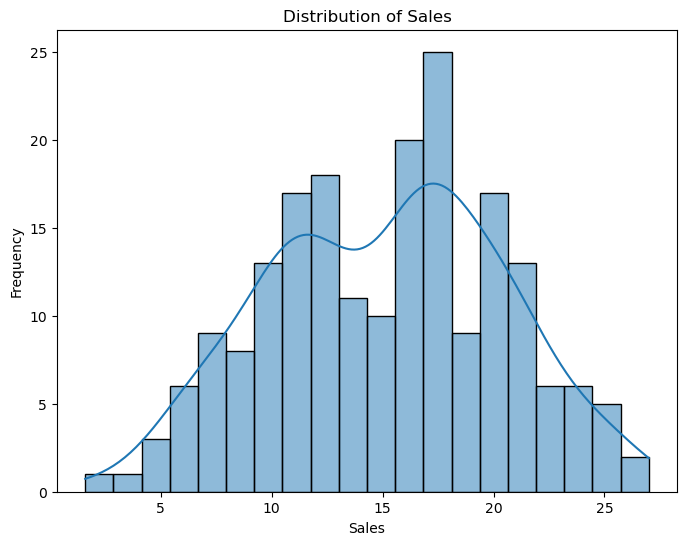

In [9]:
# Sales distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

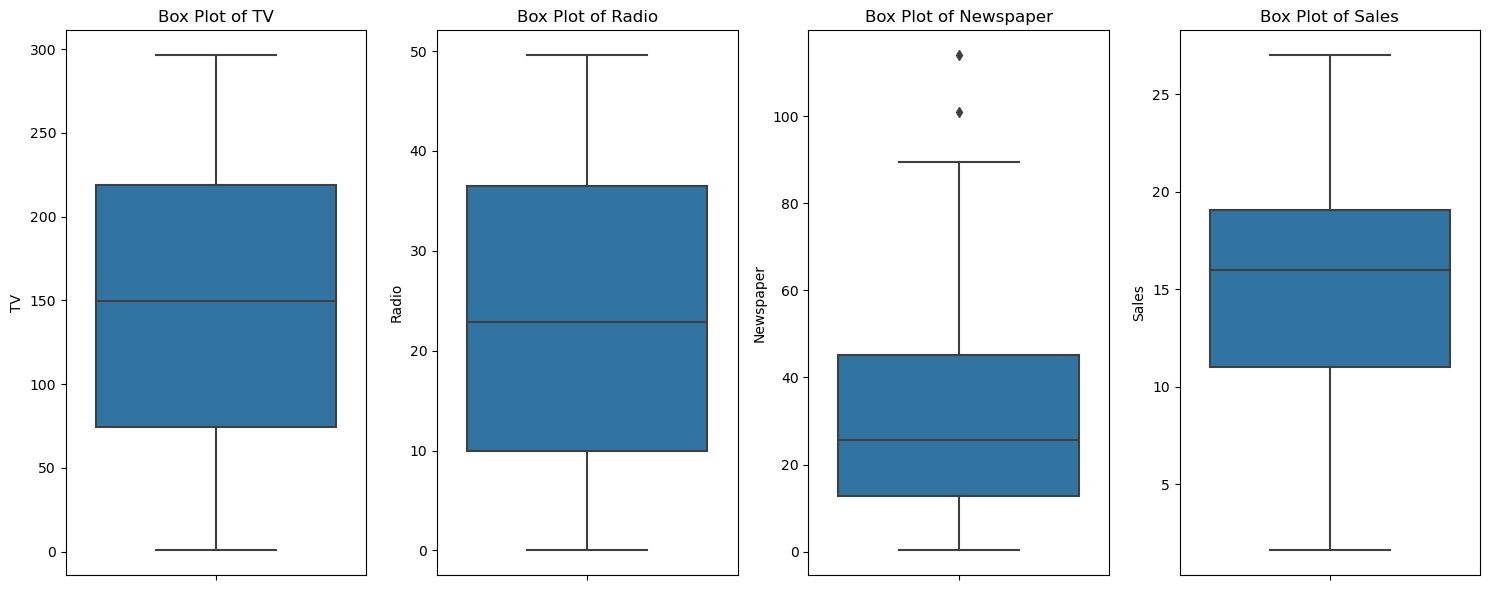

In [10]:
plt.figure(figsize=(15, 6))

attributes = ['TV', 'Radio', 'Newspaper', 'Sales']

for i, column in enumerate(attributes):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### we can observe there is not that much of outliers to affect the model

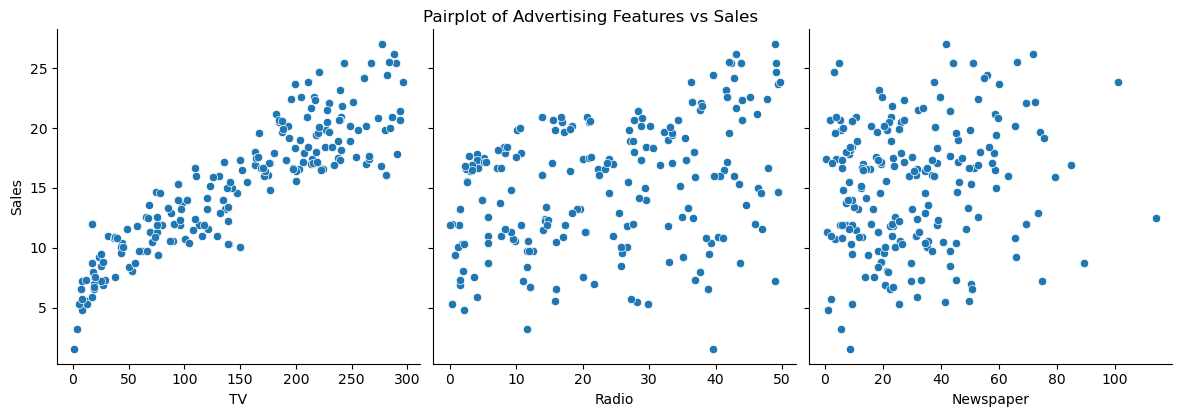

In [11]:
# Pairplot to visualize relationships between features and target variable
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Pairplot of Advertising Features vs Sales', y=1.02)
plt.show()

In [12]:
# Assuming 'Sales' is the target variable and other columns are features
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Fit the linear regression model using statsmodels
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [15]:
# Display model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2327.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                   7.48e-130
Time:                        10:11:23   Log-Likelihood:                         -367.10
No. Observations:                 160   AIC:                                      740.2
Df Residuals:                     157   BIC:                                      749.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

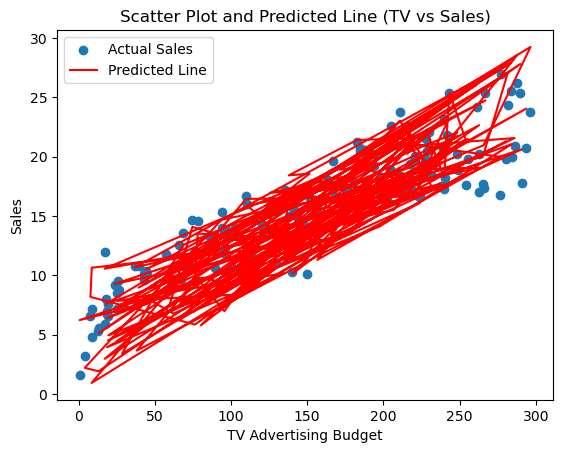

In [17]:
# Scatter plot of X_train and y_train
plt.scatter(X_train['TV'], y_train, label='Actual Sales')
plt.plot(X_train['TV'], y_train_pred, color='red', label='Predicted Line')
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("Scatter Plot and Predicted Line (TV vs Sales)")
plt.legend()
plt.show()

In [18]:
res = (y_train - y_train_pred)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14388\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


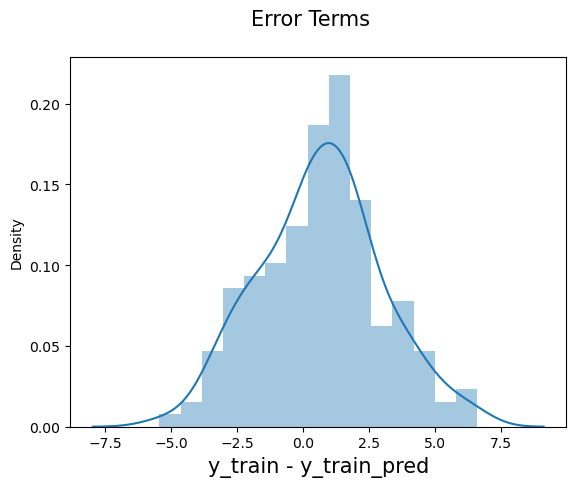

In [19]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [20]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model's performance

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [22]:
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Model Evaluation:
Mean Squared Error: 6.415150074882646
Mean Absolute Error: 1.9857953800068615


### now prediction for new dataset

In [23]:
# New data
new_data = {'TV': 34, 'Radio': 45, 'Newspaper': 3}

In [25]:
new_data = {'TV': 34, 'Radio': 45, 'Newspaper': 3}

# Add a constant term for the intercept
new_data_with_const = sm.add_constant(pd.DataFrame(new_data, index=[0]))

# Use the trained model to make predictions on the new data
prediction = model.predict(new_data_with_const)

In [26]:
print("Predicted Sales for the new data:", prediction.values[0])

Predicted Sales for the new data: 9.067031473723434
